# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*.
#### Credits:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` module, 
the custom implementation of multiclass SVm contained in `multiclass_svm.py` module and the dataset 
generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [1]:
from svm import SVM
from multiclass_svm import MulticlassSVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

RND = 42
N_SAMP = 200
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for our svm).

In [2]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    l_bound: Optional[float] = None,
                    h_bound: Optional[float] = None,
                    is_binary_custom_svm: Optional[bool] = True):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_train)
    print('Accuracy on the training set: {0:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))
    y_pred = svm.predict(X_test)
    print('Accuracy on the test set: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_binary_custom_svm:
        if l_bound is not None and h_bound is not None:
            svm.plot2D(X_train, y_train, l_bound, h_bound)
        else:
            svm.plot2D(X_train, y_train)

## 1. Sample datasets

Test the SVM on a linearly separable dataset.

3 support vectors found out of 150 data points:
1) X: [0.296 6.211]	y: -1
2) X: [1.999 5.636]	y: 1
3) X: [1.214 4.681]	y: 1
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


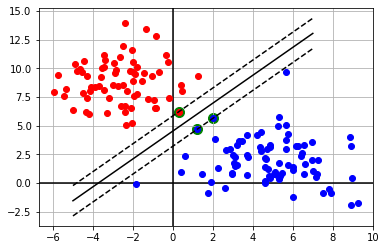

In [3]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = linear_data_generator(n_samples=N_SAMP,
                                                                         n_features=N_FEAT,
                                                                         random_state=RND)
svm_lin = SVM()
fit_and_predict(svm_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin, l_bound=-5., h_bound=7.)

Test the SVM on the same dataset, but fitting only on the support vectors found.

3 support vectors found out of 3 data points:
1) X: [0.296 6.211]	y: -1
2) X: [1.999 5.636]	y: 1
3) X: [1.214 4.681]	y: 1
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


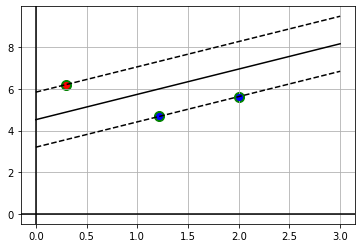

In [4]:
X_sv_lin, y_sv_lin = svm_lin.sv_X, svm_lin.sv_y
svm_lin = SVM()
fit_and_predict(svm_lin, X_sv_lin, X_test_lin, y_sv_lin, y_test_lin, l_bound=0., h_bound=3.)

Test the SVM on a semi-linearly separable dataset using a soft margin.

18 support vectors found out of 150 data points:
1) X: [-1.038 -1.72 ]	y: 1
2) X: [0.773 1.139]	y: 1
3) X: [-0.57   0.031]	y: 1
4) X: [0.02  0.747]	y: 1
5) X: [-0.78   0.154]	y: -1
6) X: [-2.862 -3.537]	y: 1
7) X: [2.513 0.814]	y: 1
8) X: [-1.862 -0.981]	y: -1
9) X: [-1.485 -0.645]	y: -1
10) X: [ 0.104 -0.103]	y: -1
11) X: [0.829 2.262]	y: -1
12) X: [0.217 1.223]	y: -1
13) X: [-0.766  0.169]	y: -1
14) X: [ 1.007 -0.721]	y: 1
15) X: [ 0.528 -1.307]	y: 1
16) X: [-1.186 -2.789]	y: 1
17) X: [-1.637 -0.87 ]	y: -1
18) X: [-1.687 -0.94 ]	y: -1
Bias of the hyper-plane: 0.038
Weights of the hyper-plane: [ 0.638 -0.614]
Accuracy on the training set: 97.33%
Accuracy on the test set: 98.00%


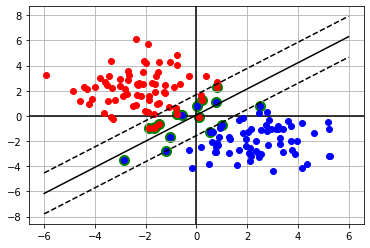

In [5]:
X_train_slin, X_test_slin, y_train_slin, y_test_slin = semi_linear_data_generator(n_samples=N_SAMP,
                                                                                  n_features=N_FEAT,
                                                                                  random_state=RND)
svm_slin = SVM(c=0.1)
fit_and_predict(svm_slin, X_train_slin, X_test_slin, y_train_slin, y_test_slin, l_bound=-6., h_bound=6.)

Test the SVM on the same dataset, but fitting only on the support vectors found.

18 support vectors found out of 18 data points:
1) X: [-1.038 -1.72 ]	y: 1
2) X: [0.773 1.139]	y: 1
3) X: [-0.57   0.031]	y: 1
4) X: [0.02  0.747]	y: 1
5) X: [-0.78   0.154]	y: -1
6) X: [-2.862 -3.537]	y: 1
7) X: [2.513 0.814]	y: 1
8) X: [-1.862 -0.981]	y: -1
9) X: [-1.485 -0.645]	y: -1
10) X: [ 0.104 -0.103]	y: -1
11) X: [0.829 2.262]	y: -1
12) X: [0.217 1.223]	y: -1
13) X: [-0.766  0.169]	y: -1
14) X: [ 1.007 -0.721]	y: 1
15) X: [ 0.528 -1.307]	y: 1
16) X: [-1.186 -2.789]	y: 1
17) X: [-1.637 -0.87 ]	y: -1
18) X: [-1.687 -0.94 ]	y: -1
Bias of the hyper-plane: 0.038
Weights of the hyper-plane: [ 0.638 -0.614]
Accuracy on the training set: 77.78%
Accuracy on the test set: 98.00%


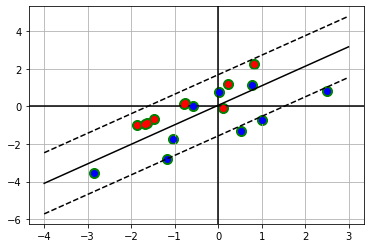

In [6]:
X_sv_slin, y_sv_slin = svm_slin.sv_X, svm_slin.sv_y
svm_slin = SVM(c=0.1)
fit_and_predict(svm_slin, X_sv_slin, X_test_slin, y_sv_slin, y_test_slin, l_bound=-4., h_bound=3.)

Test the SVM on a non-linear separable dataset.

36 support vectors found out of 150 data points:
1) X: [0.376 0.463]	y: 1
2) X: [-0.881  0.377]	y: -1
3) X: [-0.418 -0.376]	y: 1
4) X: [-0.597  0.082]	y: 1
5) X: [ 0.613 -0.717]	y: -1
6) X: [-0.232  0.836]	y: -1
7) X: [-0.158  0.908]	y: -1
8) X: [0.452 0.439]	y: 1
9) X: [ 0.044 -0.553]	y: 1
10) X: [-0.188 -0.942]	y: -1
11) X: [-0.155  0.531]	y: 1
12) X: [-0.678 -0.3  ]	y: -1
13) X: [-0.632  0.642]	y: -1
14) X: [0.353 0.41 ]	y: 1
15) X: [ 0.19 -0.98]	y: -1
16) X: [ 0.393 -0.328]	y: 1
17) X: [0.705 0.512]	y: -1
18) X: [ 0.917 -0.028]	y: -1
19) X: [-0.459 -0.162]	y: 1
20) X: [0.498 0.14 ]	y: 1
21) X: [-0.496  0.098]	y: 1
22) X: [-0.401  0.302]	y: 1
23) X: [-0.675 -0.492]	y: -1
24) X: [-0.908  0.335]	y: -1
25) X: [-0.875  0.316]	y: -1
26) X: [0.388 0.407]	y: 1
27) X: [0.555 0.716]	y: -1
28) X: [ 0.903 -0.159]	y: -1
29) X: [ 0.112 -0.544]	y: 1
30) X: [0.836 0.159]	y: -1
31) X: [ 0.38  -0.903]	y: -1
32) X: [-0.51  -0.693]	y: -1
33) X: [ 0.64  -0.571]	y: -1
34) X: [0.6   0.765]	y: -1
35) X: [

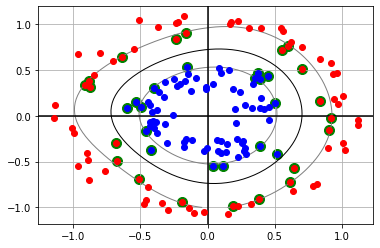

In [7]:
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = non_linear_data_generator(n_samples=N_SAMP,
                                                                                         random_state=RND)
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin, X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin)

Test the SVM on the same dataset, but fitting only on the support vectors found.

35 support vectors found out of 36 data points:
1) X: [0.376 0.463]	y: 1
2) X: [-0.881  0.377]	y: -1
3) X: [-0.418 -0.376]	y: 1
4) X: [-0.597  0.082]	y: 1
5) X: [ 0.613 -0.717]	y: -1
6) X: [-0.232  0.836]	y: -1
7) X: [-0.158  0.908]	y: -1
8) X: [0.452 0.439]	y: 1
9) X: [ 0.044 -0.553]	y: 1
10) X: [-0.188 -0.942]	y: -1
11) X: [-0.155  0.531]	y: 1
12) X: [-0.678 -0.3  ]	y: -1
13) X: [-0.632  0.642]	y: -1
14) X: [0.353 0.41 ]	y: 1
15) X: [ 0.19 -0.98]	y: -1
16) X: [ 0.393 -0.328]	y: 1
17) X: [0.705 0.512]	y: -1
18) X: [ 0.917 -0.028]	y: -1
19) X: [-0.459 -0.162]	y: 1
20) X: [0.498 0.14 ]	y: 1
21) X: [-0.496  0.098]	y: 1
22) X: [-0.401  0.302]	y: 1
23) X: [-0.675 -0.492]	y: -1
24) X: [-0.908  0.335]	y: -1
25) X: [-0.875  0.316]	y: -1
26) X: [0.388 0.407]	y: 1
27) X: [0.555 0.716]	y: -1
28) X: [ 0.903 -0.159]	y: -1
29) X: [ 0.112 -0.544]	y: 1
30) X: [0.836 0.159]	y: -1
31) X: [-0.51  -0.693]	y: -1
32) X: [ 0.64  -0.571]	y: -1
33) X: [0.6   0.765]	y: -1
34) X: [ 0.514 -0.416]	y: 1
35) X: [-0

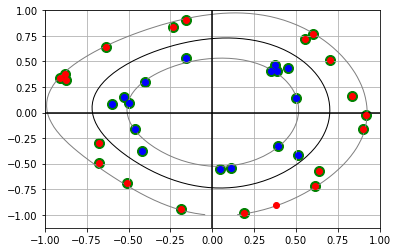

In [8]:
X_sv_nonlin, y_sv_nonlin = svm_nonlin.sv_X, svm_nonlin.sv_y
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin, X_sv_nonlin, X_test_nonlin, y_sv_nonlin, y_test_nonlin)

## 2. Sensor dataset

The following SVM models are tested on a dataset constructed by simulating measurements of distances between sensors and IoT devices in a building.

The task of the classifier is to predict the room in which the device is located given the input of the sensors.

Utility function to show a room.

In [9]:
def show_room(img_name: str):
    img = plt.imread(img_name)
    plt.figure(figsize = (15,15))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In the following figure, it is given a floor with 2 rooms (blue and red) and 5 sensors.

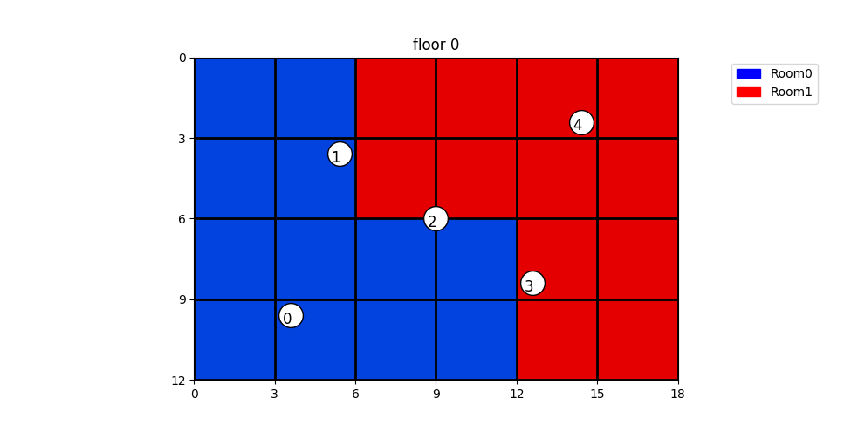

In [10]:
show_room('data/data_png/2_rooms.png')

Utility function to read and process the dataset.

In [11]:
def read_dataset(f_name: str):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y_tmp = np.array(y_raw).astype(np.float)
    y = np.fromiter((-1 if yi == 0 else 1 for yi in y_tmp), y_tmp.dtype)
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Test the SVM on a dataset sampled from the previous room.

In [12]:
f_name_bin ="data/data_2_rooms.txt"
X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens = read_dataset(f_name_bin)
svm_binsens = SVM(kernel="rbf")
fit_and_predict(svm_binsens, X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens)

477 support vectors found out of 800 data points:
1) X: [ 0.316  0.643 50.     3.646  0.307]	y: -1.0
2) X: [0.299 3.206 0.231 0.001 0.106]	y: -1.0
3) X: [0.029 0.06  0.001 0.788 0.261]	y: 1.0
4) X: [1.788 3.05  6.72  0.261 0.063]	y: -1.0
5) X: [ 0.092  0.929 25.685  0.786  0.88 ]	y: 1.0
6) X: [ 0.057 16.175  0.405  0.036  0.005]	y: -1.0
7) X: [0.245 0.075 0.739 4.325 0.159]	y: -1.0
8) X: [0.239 0.076 0.704 8.325 0.04 ]	y: -1.0
9) X: [0.25  0.119 5.256 5.674 0.124]	y: -1.0
10) X: [ 0.289  0.379 50.     7.329  0.368]	y: -1.0
11) X: [0.    3.298 0.536 0.    0.148]	y: 1.0
12) X: [0.113 0.188 7.896 6.334 1.476]	y: 1.0
13) X: [0.011 0.032 0.23  8.631 0.46 ]	y: 1.0
14) X: [ 0.231  2.263 50.     0.678  0.338]	y: 1.0
15) X: [0.077 0.139 0.397 6.283 0.826]	y: 1.0
16) X: [0.013 0.    0.001 0.66  0.052]	y: 1.0
17) X: [0.005 7.303 0.428 0.055 0.   ]	y: -1.0
18) X: [ 0.017 10.889  1.477  0.032  0.134]	y: 1.0
19) X: [ 0.284 20.543  4.828  0.178  0.228]	y: 1.0
20) X: [0.418 5.203 0.21  0.103 0.081]	y:

Compare the previous result with `sklearn.SVC`

In [13]:
svc = SVC(kernel="rbf", gamma="auto")
fit_and_predict(svc, X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens, is_binary_custom_svm=False)

Accuracy on the training set: 95.12%
Accuracy on the test set: 92.50%


In the following figure, it is given a building with 2 floors, 10 rooms and 20 sensors.

A new dataset is sampled.

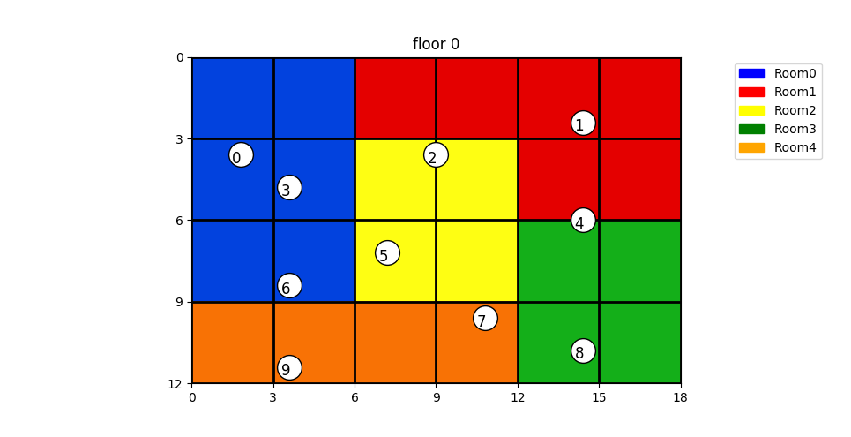

In [14]:
show_room('data/data_png/10_rooms_floor0.png')

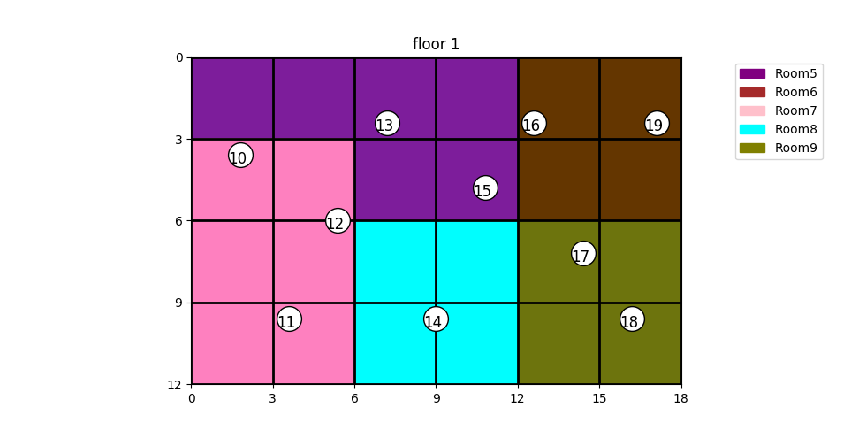

In [15]:
show_room('data/data_png/10_rooms_floor1.png')

Test the `MulticlassSVM` from the dataset sampled from the previous rooms.

In [16]:
f_name_mul ="data/data_10_rooms.txt"
X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens = read_dataset(f_name_mul)
svm_mulsens = MulticlassSVM(kernel="rbf")
fit_and_predict(svm_mulsens, X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens, is_binary_custom_svm=False)


808 support vectors found out of 8000 data points:
1) X: [ 0.055  0.972  0.06   0.001  0.292  0.001  0.     0.051  0.111  0.
  0.057  0.     0.022  0.     0.062  0.204  0.383  0.242  0.188 50.   ]	y: 1.0
2) X: [1.925 0.    0.084 4.534 0.    0.279 2.131 0.001 0.064 0.553 6.031 1.947
 1.704 0.193 0.119 0.029 0.001 0.085 0.001 0.084]	y: 1.0
3) X: [1.793 0.067 0.406 1.841 0.001 0.091 0.03  0.001 0.076 0.    3.637 0.07
 0.646 2.095 0.    0.174 0.019 0.    0.068 0.003]	y: 1.0
4) X: [ 0.103 50.     1.443  0.144  2.561  0.233  0.     0.189  0.195  0.104
  0.001  0.119  0.134  0.369  0.097  3.183 50.     0.884  0.14   0.938]	y: 1.0
5) X: [ 1.325  0.049  0.818 23.178  0.036 16.086 11.198  0.262  0.     0.719
  1.226  1.526 50.     0.602  0.642  0.268  0.085  0.144  0.114  0.065]	y: -1.0
6) X: [5.329 0.036 0.035 2.87  0.071 0.227 0.942 0.    0.034 0.282 9.74  0.467
 0.683 0.195 0.11  0.    0.001 0.    0.    0.001]	y: -1.0
7) X: [3.314 0.    0.076 0.434 0.001 0.    0.037 0.001 0.005 0.    1.088 0.

Compare the previous result with `sklearn.SVC` for multiclassification

In [17]:
svc = SVC(kernel="rbf", gamma="auto")
fit_and_predict(svc, X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens, is_binary_custom_svm=False)

Accuracy on the training set: 99.49%
Accuracy on the test set: 98.15%
